In [ ]:
# Projeto - Detecção de Risco de Evasão Escolar (Versão com 121 atributos)

# Autor: José Ahirton Batista Lopes Filho

# Bibliotecas utilizadas (9):

import numpy as np # biblioteca para nossas operações de álgebra linear
import pandas as pd # processamento de dados e leitura/criação de arquivos .CSV (ex. pd.read_csv)
import seaborn as sns # construção de nossos plots
import matplotlib.ticker as mtick # especificação do formato de nossos eixos 
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder # encoder para distinção entre nossoa atributos binários e multi-classe
from sklearn.preprocessing import MinMaxScaler # pre-processamento para normalização em 0-1
import plotly.offline as py # visualização via plotly
py.init_notebook_mode(connected=True) # visualização via plotly
import plotly.graph_objs as go # visualização via plotly
import plotly.graph_objs as go # visualização via plotly
import plotly.subplots as tls # visualização via plotly
import plotly.figure_factory as ff # visualização via plotly
import imblearn
from yellowbrick.classifier import DiscriminationThreshold
import csv
sns.set(style = 'white') # estilização de nossos plots em cor branca

/home/administrador/anaconda2/envs/py3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:144: FutureWarning:

The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.



In [ ]:
# Input de nossos dados via arquivo .CSV, separador ',', tratamento de valores N/A

#dropout_df = pd.read_csv("dados_evasao/teste_treinamento_2018AllB.csv", sep=',', na_values=" ") # dataset treino (100.000 linhas)
#dropout_df = pd.read_csv("250000_dados_AllBimestres_2018.csv", sep=',', na_values=" ") # dataset treino (250.000 linhas)
#dropout_df = pd.read_csv("teste2_treinamento_2018AllB.csv", sep=',', na_values=" ") # dataset treino (500.000 linhas)

dropout_df = pd.read_csv("dados_evasao/dados_ml_treinamento_2018_4bimestres.csv", sep=',', na_values=" ") # dataset treino (+2.500.000 linhas)

# Observação de nosso cabeçalho/primeiras 5 linhas, exibição de todas as colunas

pd.set_option('display.max_columns', None)
dropout_df.head()

,CD_MATRICULA_ALUNO,CD_ALUNO,Y,CD_TURMA,CD_ESCOLA,TP_SEXO,VL_IDADE,VL_DISTORCAO,CD_TIPO_ENSINO,NR_SERIE,CD_TURNO,VL_IDESP,VL_REPASSE_ALUNO,VL_INSE,QT_ALUNO_ESCOLA,TX_EVASAO,VL_NOTA_LP,VL_NOTA_GEO,VL_NOTA_HIST,VL_NOTA_MAT,VL_NOTA_ING,VL_NOTA_ART,VL_NOTA_EDFIS,VL_NOTA_CIEN,VL_NOTA_LP2,VL_NOTA_GEO2,VL_NOTA_HIST2,VL_NOTA_MAT2,VL_NOTA_ING2,VL_NOTA_ART2,VL_NOTA_EDFIS2,VL_NOTA_CIEN2,VL_NOTA_LP3,VL_NOTA_GEO3,VL_NOTA_HIST3,VL_NOTA_MAT3,VL_NOTA_ING3,VL_NOTA_ART3,VL_NOTA_EDFIS3,VL_NOTA_CIEN3,VL_NOTA_LP4,VL_NOTA_GEO4,VL_NOTA_HIST4,VL_NOTA_MAT4,VL_NOTA_ING4,VL_NOTA_ART4,VL_NOTA_EDFIS4,VL_NOTA_CIEN4,TX_FREQ_LP,TX_FREQ_GEO,TX_FREQ_HIST,TX_FREQ_MAT,TX_FREQ_ING,TX_FREQ_ART,TX_FREQ_EDFIS,TX_FREQ_CIEN,TX_FREQ_LP2,TX_FREQ_GEO2,TX_FREQ_HIST2,TX_FREQ_MAT2,TX_FREQ_ING2,TX_FREQ_ART2,TX_FREQ_EDFIS2,TX_FREQ_CIEN2,TX_FREQ_LP3,TX_FREQ_GEO3,TX_FREQ_HIST3,TX_FREQ_MAT3,TX_FREQ_ING3,TX_FREQ_ART3,TX_FREQ_EDFIS3,TX_FREQ_CIEN3,TX_FREQ_LP4,TX_FREQ_GEO4,TX_FREQ_HIST4,TX_FREQ_MAT4,TX_FREQ_ING4,TX_FREQ_ART4,TX_FREQ_EDFIS4,TX_FREQ_CIEN4,ESC_Código_de_situação_do_setor_censitário,ESC_Setor_é_Aglomerado_subnormal_,ESC_Grupo_do_IPVS,ESC_Domicílios_particulares_e_coletivos,ESC_Média_de_moradores_em_domicílios_particulares_permanentes,ESC_Proporção_de_crianças_de_0_a_5_anos_na_população,ESC_Rendimento_médio_domiciliar_dos_domicílios,ESC_Renda_per_capita_nos_domicílios,ESC_Proporção_de_Domicílios_sem_Renda_per_Capita,ESC_Idade_média_das_pessoas_responsáveis,ESC_Rendimento_médio_do_responsável_pelo_domicílio,ESC_Proporção_de_pessoas_responsáveis_alfabetizadas,ESC_Proporção_de_pessoas_responsáveis_de_10_a_29_anos,ESC_Participação_da_renda_do_responsável,ESC_Idade_média_mulheres_respon_pelo_domicílio,ESC_Prop_mulheres_respon_domicílio_alfabet,ESC_Prop_mulheres_respon_domicílio_menos_30_anos,ESC_Rend_médio_mulheres_responsáveis_pelo_domicílio,ESC_Prop_abastecimento_de_água,ESC_Prop_banheiro,ESC_Prop_domicílios_pp_lixo_coletado,ESC_Prop_domicílios_pp_energia_elétrica,ESC_Pop_total_residente_Mun,AL_Código_de_situação_do_setor_censitário,AL_Setor_é_Aglomerado_subnormal_,AL_Grupo_do_IPVS,AL_Domicílios_particulares_e_coletivos,AL_Média_de_moradores_em_domicílios_particulares_permanentes,AL_Proporção_de_crianças_de_0_a_5_anos_na_população,AL_Rendimento_médio_domiciliar_dos_domicílios,AL_Renda_per_capita_nos_domicílios,AL_Proporção_de_Domicílios_sem_Renda_per_Capita,AL_Idade_média_das_pessoas_responsáveis,AL_Rendimento_médio_do_responsável_pelo_domicílio,AL_Proporção_de_pessoas_responsáveis_alfabetizadas,AL_Proporção_de_pessoas_responsáveis_de_10_a_29_anos,AL_Participação_da_renda_do_responsável,AL_Idade_média_mulheres_respon_pelo_domicílio,AL_Prop_mulheres_respon_domicílio_alfabet,AL_Prop_mulheres_respon_domicílio_menos_30_anos,AL_Rend_médio_mulheres_responsáveis_pelo_domicílio,AL_Prop_abastecimento_de_água,AL_Prop_banheiro,AL_Prop_domicílios_pp_lixo_coletado,AL_Prop_domicílios_pp_energia_elétrica,AL_Pop_total_residente_Mun
0,900006532477,25340195,0,35499250,17735,F,14.0,2.0,14,7,3,3.14,33.7304,5.22,1092,0.0440,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0000,1.0000,NaN,NaN,1.0,NaN,NaN,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,NaN,1.0000,1.0000,NaN,NaN,1.0000,NaN,1.0000,1.0000,NaN,1.0000,1.0000,1.0000,1.0000,1.0000,1.0,N,2.0,89.0,3.17,5.673759,3814.752809,1203.946809,0.000000,49.696629,2405.000000,98.876404,3.370787,63.044714,49.380952,95.238095,14.285714,1516.666667,100.0,100.000000,100.0,100.0,36686.0,2.0,N,4.0,263.0,3.07,7.673267,1567.311787,510.152228,0.380228,47.437262,816.015209,93.155894,12.547529,52.064638,45.604396,94.505495,15.384615,578.527472,97.338403,98.859316,97.718631,100.0,17266.0
1,900007800631,28127559,0,35768828,20357,M,12.0,1.0,14,6,3,4.17,39.7149,2.35,1221,0.0385,3.0,5.0,3.0,1.0,7.0,5.0,7.0,1.0,4.0,5.0,5.0,2.0,3.0,5.0,2.0,2.0,4.0,5.0,6.0,2.0,6.0,6.0,2.0,6.0,4.0,5.0,7.0,1.0,3.0,5.0,5.0,4.0,0.8214,0.9524,0.8333,0.8621,1.0000,0.9,1.0000,0.8421,0.8929,0.9

In [ ]:
# Pré-processamento/limpeza de nossos dados (se houver - usando a moda Ref. https://pt.wikipedia.org/wiki/Moda_(estat%C3%ADstica))

dropout_df.fillna(dropout_df.mode(), inplace=True)

# "Dropando" CD_MATRICULA_ALUNO, CD_TURMA e CD_ESCOLA

dropout_df.drop(['CD_MATRICULA_ALUNO'],axis=1,inplace=True)
dropout_df.drop(['CD_TURMA'],axis=1,inplace=True)
dropout_df.drop(['CD_ESCOLA'],axis=1,inplace=True)

# Observação de nosso cabeçalho/primeiras 5 linhas, exibição de todas as colunas

pd.set_option('display.max_columns', None)
dropout_df.head()

,CD_ALUNO,Y,TP_SEXO,VL_IDADE,VL_DISTORCAO,CD_TIPO_ENSINO,NR_SERIE,CD_TURNO,VL_IDESP,VL_REPASSE_ALUNO,VL_INSE,QT_ALUNO_ESCOLA,TX_EVASAO,VL_NOTA_LP,VL_NOTA_GEO,VL_NOTA_HIST,VL_NOTA_MAT,VL_NOTA_ING,VL_NOTA_ART,VL_NOTA_EDFIS,VL_NOTA_CIEN,VL_NOTA_LP2,VL_NOTA_GEO2,VL_NOTA_HIST2,VL_NOTA_MAT2,VL_NOTA_ING2,VL_NOTA_ART2,VL_NOTA_EDFIS2,VL_NOTA_CIEN2,VL_NOTA_LP3,VL_NOTA_GEO3,VL_NOTA_HIST3,VL_NOTA_MAT3,VL_NOTA_ING3,VL_NOTA_ART3,VL_NOTA_EDFIS3,VL_NOTA_CIEN3,VL_NOTA_LP4,VL_NOTA_GEO4,VL_NOTA_HIST4,VL_NOTA_MAT4,VL_NOTA_ING4,VL_NOTA_ART4,VL_NOTA_EDFIS4,VL_NOTA_CIEN4,TX_FREQ_LP,TX_FREQ_GEO,TX_FREQ_HIST,TX_FREQ_MAT,TX_FREQ_ING,TX_FREQ_ART,TX_FREQ_EDFIS,TX_FREQ_CIEN,TX_FREQ_LP2,TX_FREQ_GEO2,TX_FREQ_HIST2,TX_FREQ_MAT2,TX_FREQ_ING2,TX_FREQ_ART2,TX_FREQ_EDFIS2,TX_FREQ_CIEN2,TX_FREQ_LP3,TX_FREQ_GEO3,TX_FREQ_HIST3,TX_FREQ_MAT3,TX_FREQ_ING3,TX_FREQ_ART3,TX_FREQ_EDFIS3,TX_FREQ_CIEN3,TX_FREQ_LP4,TX_FREQ_GEO4,TX_FREQ_HIST4,TX_FREQ_MAT4,TX_FREQ_ING4,TX_FREQ_ART4,TX_FREQ_EDFIS4,TX_FREQ_CIEN4,ESC_Código_de_situação_do_setor_censitário,ESC_Setor_é_Aglomerado_subnormal_,ESC_Grupo_do_IPVS,ESC_Domicílios_particulares_e_coletivos,ESC_Média_de_moradores_em_domicílios_particulares_permanentes,ESC_Proporção_de_crianças_de_0_a_5_anos_na_população,ESC_Rendimento_médio_domiciliar_dos_domicílios,ESC_Renda_per_capita_nos_domicílios,ESC_Proporção_de_Domicílios_sem_Renda_per_Capita,ESC_Idade_média_das_pessoas_responsáveis,ESC_Rendimento_médio_do_responsável_pelo_domicílio,ESC_Proporção_de_pessoas_responsáveis_alfabetizadas,ESC_Proporção_de_pessoas_responsáveis_de_10_a_29_anos,ESC_Participação_da_renda_do_responsável,ESC_Idade_média_mulheres_respon_pelo_domicílio,ESC_Prop_mulheres_respon_domicílio_alfabet,ESC_Prop_mulheres_respon_domicílio_menos_30_anos,ESC_Rend_médio_mulheres_responsáveis_pelo_domicílio,ESC_Prop_abastecimento_de_água,ESC_Prop_banheiro,ESC_Prop_domicílios_pp_lixo_coletado,ESC_Prop_domicílios_pp_energia_elétrica,ESC_Pop_total_residente_Mun,AL_Código_de_situação_do_setor_censitário,AL_Setor_é_Aglomerado_subnormal_,AL_Grupo_do_IPVS,AL_Domicílios_particulares_e_coletivos,AL_Média_de_moradores_em_domicílios_particulares_permanentes,AL_Proporção_de_crianças_de_0_a_5_anos_na_população,AL_Rendimento_médio_domiciliar_dos_domicílios,AL_Renda_per_capita_nos_domicílios,AL_Proporção_de_Domicílios_sem_Renda_per_Capita,AL_Idade_média_das_pessoas_responsáveis,AL_Rendimento_médio_do_responsável_pelo_domicílio,AL_Proporção_de_pessoas_responsáveis_alfabetizadas,AL_Proporção_de_pessoas_responsáveis_de_10_a_29_anos,AL_Participação_da_renda_do_responsável,AL_Idade_média_mulheres_respon_pelo_domicílio,AL_Prop_mulheres_respon_domicílio_alfabet,AL_Prop_mulheres_respon_domicílio_menos_30_anos,AL_Rend_médio_mulheres_responsáveis_pelo_domicílio,AL_Prop_abastecimento_de_água,AL_Prop_banheiro,AL_Prop_domicílios_pp_lixo_coletado,AL_Prop_domicílios_pp_energia_elétrica,AL_Pop_total_residente_Mun
0,25340195,0,F,14.0,2.0,14,7,3,3.14,33.7304,5.22,1092,0.0440,5.0,5.0,5.0,5.0,5.0,5.0,8.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,8.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,8.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,8.0,5.0,1.0000,1.0000,1.0000,1.0000,1.0000,1.0,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.8889,1.0000,1.0000,0.8889,0.8889,1.0000,1.0000,1.0000,1.0000,0.9000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0,N,2.0,89.0,3.17,5.673759,3814.752809,1203.946809,0.000000,49.696629,2405.000000,98.876404,3.370787,63.044714,49.380952,95.238095,14.285714,1516.666667,100.0,100.000000,100.0,100.0,36686.0,2.0,N,4.0,263.0,3.07,7.673267,1567.311787,510.152228,0.380228,47.437262,816.015209,93.155894,12.547529,52.064638,45.604396,94.505495,15.384615,578.527472,97.338403,98.859316,97.718631,100.0,17266.0
1,28127559,0,M,12.0,1.0,14,6,3,4.17,39.7149,2.35,1221,0.0385,3.0,5.0,3.0,1.0,7.0,5.0,7.0,1.0,4.0,5.0,5.0,2.0,3.0,5.0,2.0,2.0,4.0,5.0,6.0,2.0,6.0,6.0,2.0,6.0,4.0,5.0,7.0,1.0,3.0,5.0,5.0,4.0,0.8214,0.9524,0.8333,0.8621,1.0000,0.9,1.0000,0.8421,0.8929,0.9444,1.0000,0.8889,0.8000,1.0000,0.8000,0.8947,0.9259,0.9474,0.94

In [ ]:
# Fazendo a divisão entre nossas amostras de evadidos/não evadidos (dropout/non-dropout), dados categóricos/numéricos/binários e multi valorados

# Separando em evasão/não evasão (dropout/non-dropout), respectivamente (Y=1/Y=0)

dropout     = dropout_df[dropout_df["Y"] == "1"]
non_dropout = dropout_df[dropout_df["Y"] == "0"]

# Separando entre colunas categóricas e numéricas

Id_col     = ['CD_ALUNO'] # Nossa coluna de identificação CD_ALUNO
target_col = ["Y"] # Nossa coluna alvo (evasão/não evasão)
#cat_cols   = dropout_df.nunique()[dropout_df.nunique() < 10].keys().tolist() # Se valores únicos menores que 10 = atributo categórico
#cat_cols   = [x for x in cat_cols if x not in target_col] # Excetuando-se target_col
#num_cols   = [x for x in dropout_df.columns if x not in cat_cols + target_col + Id_col] # Qualquer outro caso = atributo numérico

# Observando nossos atributos numéricos

#print ("Descrição de nossos atributos numéricos")

#print ("Linhas     : " ,dropout_df[num_cols].shape[0])
#print ("Colunas  : " ,dropout_df[num_cols].shape[1])
#print ("\nAtributos : \n" ,dropout_df[num_cols].columns.tolist())
#print ("\nValores faltantes :  ",dropout_df[num_cols].isnull().sum().values.sum())
#print ("\nValores únicos :  \n",dropout_df[num_cols].nunique())

#dropout_df[num_cols].head()

# Observando nossos atributos binários

bin_cols = dropout_df.nunique()[dropout_df.nunique() == 2].keys().tolist()

# Observando em detalhes nossos atributos binários (Atr ex: Y, TP_SEXO, CD_TIPO_ENSINO e NM_TIPO_ENSINO)

#print ("Descrição de nossos atributos binários")
    
#print ("Linhas     : " ,dropout_df[bin_cols].shape[0])
#print ("Colunas  : " ,dropout_df[bin_cols].shape[1])
#print ("\nAtributos : \n" ,dropout_df[bin_cols].columns.tolist())
#print ("\nValores faltantes :  ",dropout_df[bin_cols].isnull().sum().values.sum())
#print ("\nValores únicos :  \n",dropout_df[bin_cols].nunique())

#dropout_df[bin_cols].head()

# Observando nossos atributos multi valorados (mais de dois valores)

#multi_cols = [i for i in cat_cols if i not in bin_cols]

# Observando em detalhes nossos atributos multi valorados (mais de dois valores)

#print ("Descrição de nossos atributos multi valorados")
    
#print ("Linhas     : " ,dropout_df[multi_cols].shape[0])
#print ("Colunas  : " ,dropout_df[multi_cols].shape[1])
#print ("\nAtributos : \n" ,dropout_df[multi_cols].columns.tolist())
#print ("\nValores faltantes :  ",dropout_df[multi_cols].isnull().sum().values.sum())
#print ("\nValores únicos :  \n",dropout_df[multi_cols].nunique())

#dropout_df[multi_cols].head()

# Label encoding de nossos atributos numéricos (se necessário)

le = LabelEncoder()

#for i in num_cols :
#    dropout_df[i] = le.fit_transform(dropout_df[i])

# Label encoding de nossos atributos binários

for j in bin_cols :
    dropout_df[j] = le.fit_transform(dropout_df[j].astype(str))
            
# Duplicando nossas colunas para atributos multi valorados (se necessário)
# Pandas get dummies - Dividindo colunas de dados com vários valores em conjuntos de
# colunas booleanas, uma nova coluna para cada valor exclusivo em cada coluna de entrada

#dropout_df[:] = np.nan_to_num(dropout_df)
#dropout_df = pd.get_dummies(data = dropout_df,columns = multi_cols )

# Normalização de nossos atributos numéricos (pode-se testar diferentes tipos de normalização)
# Dada uma entrada x, a transformaremos em (x-média) / desvio padrão (onde todas as dimensões e operações estão bem definidas)

#std = StandardScaler()
#std = MinMaxScaler()
#scaled = std.fit_transform(dropout_df[num_cols])
#scaled = pd.DataFrame(scaled,columns=num_cols)

# Descartando valores originais mesclando valores dimensionados para nossas colunas numéricas

#dropout_df_og = dropout_df.copy()
#dropout_df = dropout_df.drop(columns = num_cols,axis = 1)
#dropout_df = dropout_df.merge(scaled,left_index=True,right_index=True,how = "left")

# Verificando valores inf e/ou valores NA e alterando-os com seus valores de moda

#col_mask=evasao_train_df.isnull().any(axis=0)
#row_mask=evasao_train_df.isnull().any(axis=1)

#print (col_mask)
#print (row_mask)

dropout_df[:] = np.nan_to_num(dropout_df)

#pd.set_option('display.max_columns', None)
#dropout_df.head()

/home/administrador/anaconda2/envs/py3/lib/python3.8/site-packages/pandas/core/ops/array_ops.py:253: FutureWarning:

elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison



In [ ]:
# Usaremos o dataframe no qual foram criados nossas variáveis dummy

y = dropout_df['Y'].values # Atributo alvo
X = dropout_df.drop(columns = ['Y']) # Demais atributos para classificação

# Normalização de todos os nossos atributos para um intervalo de de 0 a 1 (já feito anteriormente, contingência visando qualquer eventual erro)

#from sklearn.preprocessing import MinMaxScaler
#features = X.columns.values
#scaler = MinMaxScaler(feature_range = (0,1))
#scaler.fit(X)
#X = pd.DataFrame(scaler.transform(X))
#X.columns = features

In [ ]:
# Observação de nosso cabeçalho/primeiras 5 linhas, exibição de todas as colunas

pd.set_option('display.max_columns', None)
dropout_df.head()

,CD_ALUNO,Y,TP_SEXO,VL_IDADE,VL_DISTORCAO,CD_TIPO_ENSINO,NR_SERIE,CD_TURNO,VL_IDESP,VL_REPASSE_ALUNO,VL_INSE,QT_ALUNO_ESCOLA,TX_EVASAO,VL_NOTA_LP,VL_NOTA_GEO,VL_NOTA_HIST,VL_NOTA_MAT,VL_NOTA_ING,VL_NOTA_ART,VL_NOTA_EDFIS,VL_NOTA_CIEN,VL_NOTA_LP2,VL_NOTA_GEO2,VL_NOTA_HIST2,VL_NOTA_MAT2,VL_NOTA_ING2,VL_NOTA_ART2,VL_NOTA_EDFIS2,VL_NOTA_CIEN2,VL_NOTA_LP3,VL_NOTA_GEO3,VL_NOTA_HIST3,VL_NOTA_MAT3,VL_NOTA_ING3,VL_NOTA_ART3,VL_NOTA_EDFIS3,VL_NOTA_CIEN3,VL_NOTA_LP4,VL_NOTA_GEO4,VL_NOTA_HIST4,VL_NOTA_MAT4,VL_NOTA_ING4,VL_NOTA_ART4,VL_NOTA_EDFIS4,VL_NOTA_CIEN4,TX_FREQ_LP,TX_FREQ_GEO,TX_FREQ_HIST,TX_FREQ_MAT,TX_FREQ_ING,TX_FREQ_ART,TX_FREQ_EDFIS,TX_FREQ_CIEN,TX_FREQ_LP2,TX_FREQ_GEO2,TX_FREQ_HIST2,TX_FREQ_MAT2,TX_FREQ_ING2,TX_FREQ_ART2,TX_FREQ_EDFIS2,TX_FREQ_CIEN2,TX_FREQ_LP3,TX_FREQ_GEO3,TX_FREQ_HIST3,TX_FREQ_MAT3,TX_FREQ_ING3,TX_FREQ_ART3,TX_FREQ_EDFIS3,TX_FREQ_CIEN3,TX_FREQ_LP4,TX_FREQ_GEO4,TX_FREQ_HIST4,TX_FREQ_MAT4,TX_FREQ_ING4,TX_FREQ_ART4,TX_FREQ_EDFIS4,TX_FREQ_CIEN4,ESC_Código_de_situação_do_setor_censitário,ESC_Setor_é_Aglomerado_subnormal_,ESC_Grupo_do_IPVS,ESC_Domicílios_particulares_e_coletivos,ESC_Média_de_moradores_em_domicílios_particulares_permanentes,ESC_Proporção_de_crianças_de_0_a_5_anos_na_população,ESC_Rendimento_médio_domiciliar_dos_domicílios,ESC_Renda_per_capita_nos_domicílios,ESC_Proporção_de_Domicílios_sem_Renda_per_Capita,ESC_Idade_média_das_pessoas_responsáveis,ESC_Rendimento_médio_do_responsável_pelo_domicílio,ESC_Proporção_de_pessoas_responsáveis_alfabetizadas,ESC_Proporção_de_pessoas_responsáveis_de_10_a_29_anos,ESC_Participação_da_renda_do_responsável,ESC_Idade_média_mulheres_respon_pelo_domicílio,ESC_Prop_mulheres_respon_domicílio_alfabet,ESC_Prop_mulheres_respon_domicílio_menos_30_anos,ESC_Rend_médio_mulheres_responsáveis_pelo_domicílio,ESC_Prop_abastecimento_de_água,ESC_Prop_banheiro,ESC_Prop_domicílios_pp_lixo_coletado,ESC_Prop_domicílios_pp_energia_elétrica,ESC_Pop_total_residente_Mun,AL_Código_de_situação_do_setor_censitário,AL_Setor_é_Aglomerado_subnormal_,AL_Grupo_do_IPVS,AL_Domicílios_particulares_e_coletivos,AL_Média_de_moradores_em_domicílios_particulares_permanentes,AL_Proporção_de_crianças_de_0_a_5_anos_na_população,AL_Rendimento_médio_domiciliar_dos_domicílios,AL_Renda_per_capita_nos_domicílios,AL_Proporção_de_Domicílios_sem_Renda_per_Capita,AL_Idade_média_das_pessoas_responsáveis,AL_Rendimento_médio_do_responsável_pelo_domicílio,AL_Proporção_de_pessoas_responsáveis_alfabetizadas,AL_Proporção_de_pessoas_responsáveis_de_10_a_29_anos,AL_Participação_da_renda_do_responsável,AL_Idade_média_mulheres_respon_pelo_domicílio,AL_Prop_mulheres_respon_domicílio_alfabet,AL_Prop_mulheres_respon_domicílio_menos_30_anos,AL_Rend_médio_mulheres_responsáveis_pelo_domicílio,AL_Prop_abastecimento_de_água,AL_Prop_banheiro,AL_Prop_domicílios_pp_lixo_coletado,AL_Prop_domicílios_pp_energia_elétrica,AL_Pop_total_residente_Mun
0,25340195.0,0.0,0.0,14.0,2.0,0.0,7.0,3.0,3.14,33.7304,5.22,1092.0,0.0440,5.0,5.0,5.0,5.0,5.0,5.0,8.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,8.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,8.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,8.0,5.0,1.0000,1.0000,1.0000,1.0000,1.0000,1.0,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.8889,1.0000,1.0000,0.8889,0.8889,1.0000,1.0000,1.0000,1.0000,0.9000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0,0.0,2.0,89.0,3.17,5.673759,3814.752809,1203.946809,0.000000,49.696629,2405.000000,98.876404,3.370787,63.044714,49.380952,95.238095,14.285714,1516.666667,100.0,100.000000,100.0,100.0,36686.0,2.0,0.0,4.0,263.0,3.07,7.673267,1567.311787,510.152228,0.380228,47.437262,816.015209,93.155894,12.547529,52.064638,45.604396,94.505495,15.384615,578.527472,97.338403,98.859316,97.718631,100.0,17266.0
1,28127559.0,0.0,1.0,12.0,1.0,0.0,6.0,3.0,4.17,39.7149,2.35,1221.0,0.0385,3.0,5.0,3.0,1.0,7.0,5.0,7.0,1.0,4.0,5.0,5.0,2.0,3.0,5.0,2.0,2.0,4.0,5.0,6.0,2.0,6.0,6.0,2.0,6.0,4.0,5.0,7.0,1.0,3.0,5.0,5.0,4.0,0.8214,0.9524,0.8333,0.8621,1.0000,0.9,1.0000,0.8421,0.8929,0.9444,1.0000,0.8889,0.8000,1.0000,0.

In [ ]:
# Criando nossos datasets de treino e teste (já basedos em y e X)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=55) # Aplicando pareto (80/20) e semente 55

In [ ]:
# Teste 1 - Regressão Logística

#from sklearn.linear_model import LogisticRegression

#model = LogisticRegression() # % de acurácia (implementação convencional)

#model = LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
#          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
#          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
#          verbose=0, warm_start=False) # 98.735% de acurácia (implementação detalhada)

#result = model.fit(X_train, y_train)

In [ ]:
from sklearn import metrics
#prediction_test = model.predict(X_test)

# Predição quanto a acurácia para nosso algoritmo de Regressão Logística

#print (metrics.accuracy_score(y_test, prediction_test))

In [ ]:
# Matriz de confusão simples para nosso algoritmo de Regressão Logística (Teste 1)

#from sklearn.metrics import classification_report, confusion_matrix  
#print(confusion_matrix(y_test,prediction_test)) 

In [ ]:
# Obtendo pesos/significância para os atributos neste resultado de classificação (mais significativos)

#weights = pd.Series(model.coef_[0],
#                 index=X.columns.values)
#print (weights.sort_values(ascending = False)[:10].plot(kind='bar'))

In [ ]:
# Obtendo pesos/significância para os atributos neste resultado de classificação (menos significativos)

#print(weights.sort_values(ascending = False)[-10:].plot(kind='bar'))

In [ ]:
# Teste 2 - Random Forest Algorithm (Floresta Randômica ou Aleatória)

# Criando nossos datasets de treino e teste (já basedos em y e X)

from sklearn.ensemble import RandomForestClassifier
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=55)

#model_rf = RandomForestClassifier() # % de acurácia (implementação convencional)

model_rf = RandomForestClassifier(n_estimators=1000 , oob_score = True, n_jobs = -1,
                                  random_state =55, max_features = "auto",
                                  max_leaf_nodes = 30) # 98.73% de acurácia (RF - implementação detalhada)
model_rf.fit(X_train, y_train)

# Predição quanto a acurácia para nosso algoritmo de Floresta Randômica

prediction_test = model_rf.predict(X_test)
print (metrics.accuracy_score(y_test, prediction_test))

0.9865786068787054


In [ ]:
# Matriz de confusão simples para nosso algoritmo de Floresta Randômica (Teste 2)

from sklearn.metrics import classification_report, confusion_matrix  
print(confusion_matrix(y_test,prediction_test)) 

[[510566     50]
 [  6900    314]]


AxesSubplot(0.125,0.125;0.775x0.755)


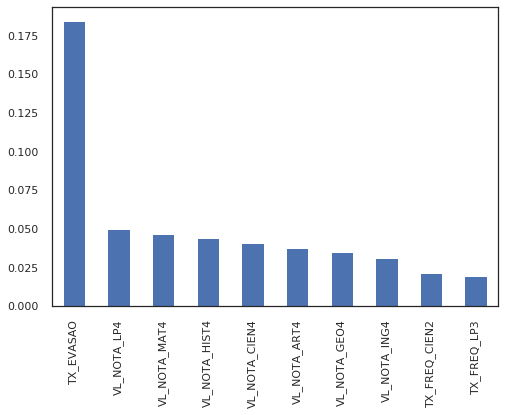

In [ ]:
# Obtendo pesos/significância para os atributos neste resultado de classificação (mais significativos)

importances = model_rf.feature_importances_
weights = pd.Series(importances,
                 index=X.columns.values)

print (weights.sort_values(ascending = False)[:10].plot(kind='bar'))

AxesSubplot(0.125,0.125;0.775x0.755)


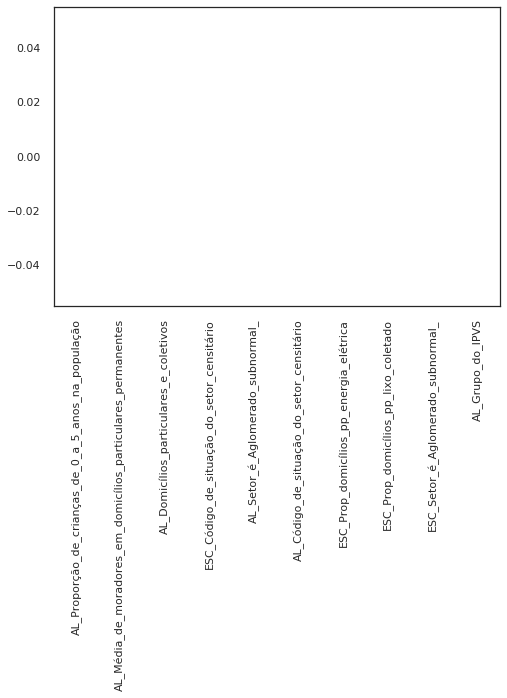

In [ ]:
# Obtendo pesos/significância para os atributos neste resultado de classificação (menos significativos)

print(weights.sort_values(ascending = False)[-10:].plot(kind='bar'))

In [ ]:
# Teste 3 - Algoritmo Support Vector Classifier (SVM like)

#from sklearn.svm import SVC

#model_svm = SVC(kernel='linear') # 98.61% de acurácia (implementação convencional)

#model_svm = SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
#               decision_function_shape='ovr', degree=3, gamma=1.0, kernel='linear',
#               max_iter=-1, probability=False, random_state=None, shrinking=True,
#               tol=0.001, verbose=False) # 98.53% de acurácia (SVC - implementação detalhada)

#model_svm.fit(X_train,y_train)
#preds = model_svm.predict(X_test)
#metrics.accuracy_score(y_test, preds)

In [ ]:
# Matriz de confusão simples para nosso algoritmo SVC (Teste 3)

#from sklearn.metrics import classification_report, confusion_matrix  
#print(confusion_matrix(y_test,preds))

In [ ]:
# Obtendo pesos/significância para os atributos neste resultado de classificação (mais significativos)

#weights = pd.Series(model_svm.coef_[0],
#                 index=X.columns.values)
#print (weights.sort_values(ascending = False)[:10].plot(kind='bar'))

In [ ]:
# Obtendo pesos/significância para os atributos neste resultado de classificação (menos significativos)

#print(weights.sort_values(ascending = False)[-10:].plot(kind='bar'))

In [ ]:
# Teste 4 - Algoritmo AdaBoost

from sklearn.ensemble import AdaBoostClassifier

model_ab = AdaBoostClassifier() # 98.885% de acurácia (Adaboost - implementação detalhada)
# n_estimators = 50 (default) 
# base_estimator = DecisionTreeClassifier (default)

model_ab.fit(X_train,y_train)
preds = model_ab.predict(X_test)
metrics.accuracy_score(y_test, preds)

print(metrics.accuracy_score(y_test, preds))

from sklearn.metrics import classification_report, confusion_matrix  

print(confusion_matrix(y_test,preds))

In [ ]:
# Obtendo pesos/significância para os atributos neste resultado de classificação (mais significativos)

importances = model_ab.feature_importances_
weights = pd.Series(importances,
                 index=X.columns.values)

print (weights.sort_values(ascending = False)[:10].plot(kind='bar'))

In [ ]:
# Obtendo pesos/significância para os atributos neste resultado de classificação (menos significativos)

print(weights.sort_values(ascending = False)[-10:].plot(kind='bar'))

In [ ]:
# Teste 5 - Algoritmo XGBoost

from xgboost import XGBClassifier

model_xgb = XGBClassifier() # 99.135% de acurácia (XGBoost - implementação detalhada)

model_xgb.fit(X_train, y_train)
preds = model_xgb.predict(X_test)
metrics.accuracy_score(y_test, preds)
print(metrics.accuracy_score(y_test, preds))

from sklearn.metrics import classification_report, confusion_matrix  
print(confusion_matrix(y_test,preds))

In [ ]:
# Obtendo pesos/significância para os atributos neste resultado de classificação (mais significativos)

importances = model_xgb.feature_importances_
weights = pd.Series(importances,
                 index=X.columns.values)

print (weights.sort_values(ascending = False)[:10].plot(kind='bar'))

In [ ]:
# Obtendo pesos/significância para os atributos neste resultado de classificação (menos significativos)

print(weights.sort_values(ascending = False)[-10:].plot(kind='bar'))

In [ ]:
# Teste 6 - Algoritmo Naive Bayes

from sklearn.naive_bayes import GaussianNB

model_nb = GaussianNB() # 88.395% de acurácia (Naive Bayes Gaussiano - implementação detalhada)

model_nb.fit(X_train, y_train)
preds = model_nb.predict(X_test)
metrics.accuracy_score(y_test, preds)
print(metrics.accuracy_score(y_test, preds))

from sklearn.metrics import classification_report, confusion_matrix  
print(confusion_matrix(y_test,preds))

In [ ]:
# Observação de nosso X_train para verificação quanto a nosso input para classificação

#pd.set_option('display.max_columns', None)
#X_train.head()

In [ ]:
# Verificação de nossos resultados com oversampling (ex: SMOTE)
# Melhores resultados até agora: Regressão Logística, Floresta Randômica e SVC (Atualização: 02/03/2020)

#from imblearn.over_sampling import SMOTE

#cols    = [i for i in dropout_df.columns if i not in Id_col+target_col]

#smote_X = dropout_df[cols]
#smote_Y = dropout_df[target_col]

# Divisão em dados de treino e teste

#smote_train_X,smote_test_X,smote_train_Y,smote_test_Y = train_test_split(smote_X,smote_Y,
#                                                                         test_size = .20 ,
#                                                                         random_state = 55)

In [ ]:
# Observação de nosso smote_train_X

#pd.set_option('display.max_columns', None)
#smote_train_X.head()

In [ ]:
# Observação de nosso smote_test_X

#pd.set_option('display.max_columns', None)
#smote_train_X.head()

In [ ]:
# Oversampling da nossa classe minoritária (evadidos) usando o SMOTE

#os = SMOTE(random_state = 0)
#os_smote_X,os_smote_Y = os.fit_sample(smote_train_X,smote_train_Y)
#os_smote_X = pd.DataFrame(data = os_smote_X,columns=cols)
#os_smote_Y = pd.DataFrame(data = os_smote_Y,columns=target_col)

In [ ]:
# Observação de nosso os_smote_X

#pd.set_option('display.max_columns', None)
#os_smote_X.head()

In [ ]:
# Observação de nosso os_smote_Y

#pd.set_option('display.max_columns', None)
#os_smote_Y.head()

In [ ]:
# Teste 7 - SMOTE + Regressão Logística

'''
model_logit_smote = LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False) # 94.13% de acurácia (RL + SMOTE - implementação detalhada)

result = model_logit_smote.fit(os_smote_X,os_smote_Y.values.ravel())
preds = model_logit_smote.predict(smote_test_X)
metrics.accuracy_score(smote_test_Y, preds)
print(metrics.accuracy_score(smote_test_Y, preds))

from sklearn.metrics import classification_report, confusion_matrix   

print("Report de classificação %s:\n%s\n"
      % (result, metrics.classification_report(smote_test_Y,preds)))
disp = metrics.plot_confusion_matrix(result, smote_test_X, smote_test_Y)
disp.figure_.suptitle("Matriz de Confusão")
print("Matriz de Confusão:\n%s" % disp.confusion_matrix)

In [ ]:
# Teste 8 - SMOTE + Floresta Randômica

'''
model_rf_smote = RandomForestClassifier(n_estimators=1000 , oob_score = True, n_jobs = -1,
                                  random_state =50, max_features = "auto",
                                  max_leaf_nodes = 30) # 95.775% de acurácia (RF + SMOTE - implementação detalhada)

result = model_rf_smote.fit(os_smote_X, os_smote_Y.values.ravel())
preds = model_rf_smote.predict(smote_test_X)
metrics.accuracy_score(smote_test_Y, preds)
print(metrics.accuracy_score(smote_test_Y, preds))

from sklearn.metrics import classification_report, confusion_matrix   

print("Report de classificação %s:\n%s\n"
      % (result, metrics.classification_report(smote_test_Y,preds)))
disp = metrics.plot_confusion_matrix(result, smote_test_X, smote_test_Y)
disp.figure_.suptitle("Matriz de Confusão")
print("Matriz de Confusão:\n%s" % disp.confusion_matrix)

In [ ]:
# Teste 9 - SMOTE + SVC

'''
model_svm_smote = SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
               decision_function_shape='ovr', degree=3, gamma=1.0, kernel='linear',
               max_iter=-1, probability=True, random_state=None, shrinking=True,
               tol=0.001, verbose=False) # 98.54% de acurácia ( RF + SVC - implementação detalhada)

result = model_svm_smote.fit(os_smote_X, os_smote_Y.values.ravel())
preds = model_svm_smote.predict(smote_test_X)
metrics.accuracy_score(smote_test_Y, preds)
print(metrics.accuracy_score(smote_test_Y, preds))

from sklearn.metrics import classification_report, confusion_matrix  

print("Report de classificação %s:\n%s\n"
      % (result, metrics.classification_report(smote_test_Y,preds)))
disp = metrics.plot_confusion_matrix(result, smote_test_X, smote_test_Y)
disp.figure_.suptitle("Matriz de Confusão")
print("Matriz de Confusão:\n%s" % disp.confusion_matrix)

In [ ]:
# Observação de nosso cabeçalho/primeiras 5 linhas, exibição de todas as colunas

#pd.set_option('display.max_columns', None)
#dropout_df.head()

In [ ]:
# Salvando nossos melhores modelos previamente treinados (via ´Pickle' Ref. https://machinelearningmastery.com/save-load-machine-learning-models-python-scikit-learn/)

# Usando o pickle para salvar nosso modelo de Floresta Randômica (Teste 2) para uso posterior

import pickle

filename = 'dados_evasao/rf_dropout_model.sav'
pickle.dump(model_rf, open(filename, 'wb'))

# Usando o pickle para salvar nosso modelo de SVC (Teste 3) para uso posterior

#filename = 'dados_evasao/svc_dropout_model.sav'
#pickle.dump(model_svm, open(filename, 'wb'))

# Usando o pickle para salvar nosso modelo SMOTE + Floresta Randômica (Teste 8) para uso posterior

#filename = 'dados_evasao/smote_rf_dropout_model.sav'
#pickle.dump(model_rf_smote, open(filename, 'wb'))

# Usando o pickle para salvar nosso modelo SMOTE + SVC (Teste 9) para uso posterior

#filename = 'svm_smote_dropout_model.sav'
#pickle.dump(model_svm_smote, open(filename, 'wb'))


In [ ]:
# Abrindo modelo Floresta Randômica salvo e realizando predição com dados de teste (Ex: X_test, y_test)

filename = 'dados_evasao/rf_dropout_model.sav'
loaded_model = pickle.load(open(filename, 'rb')) # 98.73% de acurácia
result = loaded_model.score(X_test, y_test)
print(result)

# Abrindo modelo SVC salvo e realizando predição com dados de teste (Ex: X_test, y_test)

#filename = 'dados_evasao/svc_dropout_model.sav'
#loaded_model = pickle.load(open(filename, 'rb')) # 98.535% de acurácia
#result = loaded_model.score(X_test, y_test)
#print(result)

# Abrindo modelo SMOTE + Floresta Randômica salvo e realizando predição com dados de teste (Ex: smote_test_X, smote_test_Y)

#filename = 'dados_evasao/smote_rf_dropout_model.sav'
#loaded_model = pickle.load(open(filename, 'rb'))
#result = loaded_model.score(smote_test_X, smote_test_Y)
#print(result)

# Abrindo modelo SMOTE + SVC salvo e realizando predição com dados de teste (Ex: smote_test_X, smote_test_Y)

#filename = 'dados_evasao/svm_smote_dropout_model.sav'
#loaded_model = pickle.load(open(filename, 'rb'))
#result = loaded_model.score(smote_test_X, smote_test_Y)
#print(result)

0.9865786068787054


In [ ]:
# Pré processamento de nossa massa de dados de testes (Ex:. dados 2019)

dropout_df2 = pd.read_csv("dados_evasao/dados_ml_teste_2019_4bimestres.csv", sep=',', na_values=" ") # dataset treino - teste completo (+2.500.000 linhas)

# Pré-processamento/limpeza de nossos dados (se houver - usando a moda Ref. https://pt.wikipedia.org/wiki/Moda_(estat%C3%ADstica))

dropout_df2.fillna(dropout_df2.mode(), inplace=True)

# "Dropando" CD_MATRICULA_ALUNO, CD_TURMA e CD_ESCOLA

dropout_df2.drop(['CD_MATRICULA_ALUNO'],axis=1,inplace=True)
dropout_df2.drop(['CD_TURMA'],axis=1,inplace=True)
dropout_df2.drop(['CD_ESCOLA'],axis=1,inplace=True)

# Fazendo a divisão entre nossas amostras de evadidos/não evadidos (dropout/non-dropout), dados categóricos/numéricos/binários e multi valorados

# Separando em evasão/não evasão ((dropout/non-dropout), respectivamente Y=1/Y=0)

dropout     = dropout_df2[dropout_df2["Y"] == "1"]
non_dropout = dropout_df2[dropout_df2["Y"] == "0"]

# Separando entre colunas categóricas e numéricas

Id_col     = ['CD_ALUNO'] # Nossa coluna de identificação CD_ALUNO
target_col = ["Y"] # Nossa coluna alvo (evasão/não evasão)
#cat_cols   = dropout_df2.nunique()[dropout_df2.nunique() < 10].keys().tolist() # Se valores únicos menores que 10 = atributo categórico
#cat_cols   = [x for x in cat_cols if x not in target_col] # Excetuando-se target_col
#num_cols   = [x for x in dropout_df2.columns if x not in cat_cols + target_col + Id_col] # Qualquer outro caso = atributo numérico

# Observando nossos atributos numéricos

#print ("Descrição de nossos atributos numéricos")

#print ("Rows     : " ,dropout_df3[num_cols].shape[0])
#print ("Columns  : " ,dropout_df3[num_cols].shape[1])
#print ("\nFeatures : \n" ,dropout_df3[num_cols].columns.tolist())
#print ("\nMissing values :  ",dropout_df3[num_cols].isnull().sum().values.sum())
#print ("\nUnique values :  \n",dropout_df3[num_cols].nunique())

#dropout_df3[num_cols].head()

# Observando nossos atributos binários

bin_cols = dropout_df2.nunique()[dropout_df2.nunique() == 2].keys().tolist()

# Observando em detalhes nossos atributos binários (Atr ex: Y, TP_SEXO, CD_TIPO_ENSINO e NM_TIPO_ENSINO)

#print ("Descrição de nossos atributos binários")
    
#print ("Rows     : " ,dropout_df3[bin_cols].shape[0])
#print ("Columns  : " ,dropout_df3[bin_cols].shape[1])
#print ("\nFeatures : \n" ,dropout_df3[bin_cols].columns.tolist())
#print ("\nMissing values :  ",dropout_df3[bin_cols].isnull().sum().values.sum())
#print ("\nUnique values :  \n",dropout_df3[bin_cols].nunique())

dropout_df2[bin_cols].head()

# Observando nossos atributos multi valorados (mais de dois valores)

#multi_cols = [i for i in cat_cols if i not in bin_cols]

# Observando em detalhes nossos atributos multi valorados (mais de dois valores)

#print ("Descrição de nossos atributos multi valorados")
    
#print ("Rows     : " ,dropout_df3[multi_cols].shape[0])
#print ("Columns  : " ,dropout_df3[multi_cols].shape[1])
#print ("\nFeatures : \n" ,dropout_df3[multi_cols].columns.tolist())
#print ("\nMissing values :  ",dropout_df3[multi_cols].isnull().sum().values.sum())
#print ("\nUnique values :  \n",dropout_df3[multi_cols].nunique())

#dropout_df2[multi_cols].head()

# Label encoding de nossos atributos numéricos (se necessário)

le = LabelEncoder()

#for i in num_cols :
#    dropout_df2[i] = le.fit_transform(dropout_df2[i])

# Label encoding de nossos atributos binários

for j in bin_cols :
    dropout_df2[j] = le.fit_transform(dropout_df2[j].astype(str))
            
# Duplicando nossas colunas para atributos multi valorados
# Pandas get dummies - Dividindo colunas de dados com vários valores em conjuntos de
# colunas booleanas, uma nova coluna para cada valor exclusivo em cada coluna de entrada

#dropout_df2[:] = np.nan_to_num(dropout_df2)
#dropout_df2 = pd.get_dummies(data = dropout_df2,columns = multi_cols )

# Normalização de nossos atributos numéricos (pode-s etestar diferentes tipos de normalização)
# Dada uma entrada x, a transformaremos em (x-média) / desvio padrão (onde todas as dimensões e operações estão bem definidas)

#std = StandardScaler()
#std = MinMaxScaler()
#scaled = std.fit_transform(dropout_df2[num_cols])
#scaled = pd.DataFrame(scaled,columns=num_cols)

# Descartando valores originais mesclando valores dimensionados para nossas colunas numéricas

#dropout_df_og2 = dropout_df2.copy()
#dropout_df2 = dropout_df2.drop(columns = num_cols,axis = 1)
#dropout_df2 = dropout_df2.merge(scaled,left_index=True,right_index=True,how = "left")

# Verificando valores inf e/ou valores NA e alterando-os com seus valores de moda

#col_mask=evasao_train_df2.isnull().any(axis=0)
#row_mask=evasao_train_df2.isnull().any(axis=1)

#print (col_mask)
#print (row_mask)

dropout_df2[:] = np.nan_to_num(dropout_df2)

#pd.set_option('display.max_columns', None)
#dropout_df2.head()

# Usaremos o dataframe no qual foram criados nossas variáveis dummy

#y = dropout_df2['Y'].values # Atributo alvo
#X = dropout_df2.drop(columns = ['Y']) #Demais atributos para classificação

/home/administrador/anaconda2/envs/py3/lib/python3.8/site-packages/pandas/core/ops/array_ops.py:253: FutureWarning:

elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison



In [ ]:
# Normalização de todos os nossos atributos para um intervalo de de 0 a 1 (já feito anteriormente, contingência visando qualquer eventual erro)

#from sklearn.preprocessing import MinMaxScaler
#features = X.columns.values
#scaler = MinMaxScaler(feature_range = (0,1))
#scaler.fit(X)
#X = pd.DataFrame(scaler.transform(X))
#X.columns = features

In [ ]:
# Observação de nosso cabeçalho/primeiras 5 linhas, exibição de todas as colunas

pd.set_option('display.max_columns', None)
dropout_df2.head()

,CD_ALUNO,Y,TP_SEXO,VL_IDADE,VL_DISTORCAO,CD_TIPO_ENSINO,NR_SERIE,CD_TURNO,VL_IDESP,VL_REPASSE_ALUNO,VL_INSE,QT_ALUNO_ESCOLA,TX_EVASAO,VL_NOTA_LP,VL_NOTA_GEO,VL_NOTA_HIST,VL_NOTA_MAT,VL_NOTA_ING,VL_NOTA_ART,VL_NOTA_EDFIS,VL_NOTA_CIEN,VL_NOTA_LP2,VL_NOTA_GEO2,VL_NOTA_HIST2,VL_NOTA_MAT2,VL_NOTA_ING2,VL_NOTA_ART2,VL_NOTA_EDFIS2,VL_NOTA_CIEN2,VL_NOTA_LP3,VL_NOTA_GEO3,VL_NOTA_HIST3,VL_NOTA_MAT3,VL_NOTA_ING3,VL_NOTA_ART3,VL_NOTA_EDFIS3,VL_NOTA_CIEN3,VL_NOTA_LP4,VL_NOTA_GEO4,VL_NOTA_HIST4,VL_NOTA_MAT4,VL_NOTA_ING4,VL_NOTA_ART4,VL_NOTA_EDFIS4,VL_NOTA_CIEN4,TX_FREQ_LP,TX_FREQ_GEO,TX_FREQ_HIST,TX_FREQ_MAT,TX_FREQ_ING,TX_FREQ_ART,TX_FREQ_EDFIS,TX_FREQ_CIEN,TX_FREQ_LP2,TX_FREQ_GEO2,TX_FREQ_HIST2,TX_FREQ_MAT2,TX_FREQ_ING2,TX_FREQ_ART2,TX_FREQ_EDFIS2,TX_FREQ_CIEN2,TX_FREQ_LP3,TX_FREQ_GEO3,TX_FREQ_HIST3,TX_FREQ_MAT3,TX_FREQ_ING3,TX_FREQ_ART3,TX_FREQ_EDFIS3,TX_FREQ_CIEN3,TX_FREQ_LP4,TX_FREQ_GEO4,TX_FREQ_HIST4,TX_FREQ_MAT4,TX_FREQ_ING4,TX_FREQ_ART4,TX_FREQ_EDFIS4,TX_FREQ_CIEN4,ESC_Código_de_situação_do_setor_censitário,ESC_Setor_é_Aglomerado_subnormal_,ESC_Grupo_do_IPVS,ESC_Domicílios_particulares_e_coletivos,ESC_Média_de_moradores_em_domicílios_particulares_permanentes,ESC_Proporção_de_crianças_de_0_a_5_anos_na_população,ESC_Rendimento_médio_domiciliar_dos_domicílios,ESC_Renda_per_capita_nos_domicílios,ESC_Proporção_de_Domicílios_sem_Renda_per_Capita,ESC_Idade_média_das_pessoas_responsáveis,ESC_Rendimento_médio_do_responsável_pelo_domicílio,ESC_Proporção_de_pessoas_responsáveis_alfabetizadas,ESC_Proporção_de_pessoas_responsáveis_de_10_a_29_anos,ESC_Participação_da_renda_do_responsável,ESC_Idade_média_mulheres_respon_pelo_domicílio,ESC_Prop_mulheres_respon_domicílio_alfabet,ESC_Prop_mulheres_respon_domicílio_menos_30_anos,ESC_Rend_médio_mulheres_responsáveis_pelo_domicílio,ESC_Prop_abastecimento_de_água,ESC_Prop_banheiro,ESC_Prop_domicílios_pp_lixo_coletado,ESC_Prop_domicílios_pp_energia_elétrica,ESC_Pop_total_residente_Mun,AL_Código_de_situação_do_setor_censitário,AL_Setor_é_Aglomerado_subnormal_,AL_Grupo_do_IPVS,AL_Domicílios_particulares_e_coletivos,AL_Média_de_moradores_em_domicílios_particulares_permanentes,AL_Proporção_de_crianças_de_0_a_5_anos_na_população,AL_Rendimento_médio_domiciliar_dos_domicílios,AL_Renda_per_capita_nos_domicílios,AL_Proporção_de_Domicílios_sem_Renda_per_Capita,AL_Idade_média_das_pessoas_responsáveis,AL_Rendimento_médio_do_responsável_pelo_domicílio,AL_Proporção_de_pessoas_responsáveis_alfabetizadas,AL_Proporção_de_pessoas_responsáveis_de_10_a_29_anos,AL_Participação_da_renda_do_responsável,AL_Idade_média_mulheres_respon_pelo_domicílio,AL_Prop_mulheres_respon_domicílio_alfabet,AL_Prop_mulheres_respon_domicílio_menos_30_anos,AL_Rend_médio_mulheres_responsáveis_pelo_domicílio,AL_Prop_abastecimento_de_água,AL_Prop_banheiro,AL_Prop_domicílios_pp_lixo_coletado,AL_Prop_domicílios_pp_energia_elétrica,AL_Pop_total_residente_Mun
0,21935885.0,1.0,1.0,19.0,4.0,1.0,1.0,5.0,2.06,40.2806,5.97,926.0,0.0400,2.0,2.0,1.0,2.0,1.0,3.0,8.0,2.0,0.0,0.0,0.0,5.0,0.0,5.0,8.0,5.0,5.0,0.0,0.0,5.0,0.0,5.0,8.0,5.0,5.0,0.0,0.0,5.0,5.0,5.0,8.0,5.0,0.7000,0.8333,0.7778,0.8378,0.5556,0.7000,0.9,0.6271,0.0000,0.900,0.0833,0.9000,0.0000,0.9000,0.90,0.8750,0.9000,0.8889,0.8889,0.9000,0.0000,0.8889,0.8889,0.9500,0.900,0.9,0.9000,0.9000,0.9000,0.9000,0.9,0.9500,3.0,0.0,5.0,276.0,3.485507,12.058212,945.713768,271.327443,24.637681,38.510870,361.898551,90.579710,33.695652,38.267239,37.396739,91.304348,35.869565,268.777174,89.855072,62.681159,100.0,100.0,11253503.0,3.0,0.0,5.0,276.0,3.485507,12.058212,945.713768,271.327443,24.637681,38.510870,361.898551,90.579710,33.695652,38.267239,37.396739,91.304348,35.869565,268.777174,89.855072,62.681159,100.00000,100.00000,11253503.0
1,22472255.0,0.0,1.0,16.0,0.0,1.0,2.0,5.0,2.85,53.4927,4.54,995.0,0.0000,7.0,7.0,7.0,6.0,9.0,10.0,0.0,7.0,7.0,3.0,8.0,7.0,7.0,8.0,0.0,6.0,8.0,5.0,8.0,9.0,10.0,8.0,0.0,7.0,7.0,4.0,10.0,10.0,7.0,10.0,0.0,7.0,0.9250,0.0000,0.8500,0.0000,0.0000,0.0000,0.0,0.9355,0.9250,0.100,0.9000,0.9250,0.

In [ ]:
# "Dropando" nosso atributo quanto a evasão (Y)

dropout_df2.drop(['Y'],axis=1,inplace=True)

In [ ]:
# Observação de nosso cabeçalho/primeiras 5 linhas, exibição de todas as colunas

pd.set_option('display.max_columns', None)
dropout_df2.head()

,CD_ALUNO,TP_SEXO,VL_IDADE,VL_DISTORCAO,CD_TIPO_ENSINO,NR_SERIE,CD_TURNO,VL_IDESP,VL_REPASSE_ALUNO,VL_INSE,QT_ALUNO_ESCOLA,TX_EVASAO,VL_NOTA_LP,VL_NOTA_GEO,VL_NOTA_HIST,VL_NOTA_MAT,VL_NOTA_ING,VL_NOTA_ART,VL_NOTA_EDFIS,VL_NOTA_CIEN,VL_NOTA_LP2,VL_NOTA_GEO2,VL_NOTA_HIST2,VL_NOTA_MAT2,VL_NOTA_ING2,VL_NOTA_ART2,VL_NOTA_EDFIS2,VL_NOTA_CIEN2,VL_NOTA_LP3,VL_NOTA_GEO3,VL_NOTA_HIST3,VL_NOTA_MAT3,VL_NOTA_ING3,VL_NOTA_ART3,VL_NOTA_EDFIS3,VL_NOTA_CIEN3,VL_NOTA_LP4,VL_NOTA_GEO4,VL_NOTA_HIST4,VL_NOTA_MAT4,VL_NOTA_ING4,VL_NOTA_ART4,VL_NOTA_EDFIS4,VL_NOTA_CIEN4,TX_FREQ_LP,TX_FREQ_GEO,TX_FREQ_HIST,TX_FREQ_MAT,TX_FREQ_ING,TX_FREQ_ART,TX_FREQ_EDFIS,TX_FREQ_CIEN,TX_FREQ_LP2,TX_FREQ_GEO2,TX_FREQ_HIST2,TX_FREQ_MAT2,TX_FREQ_ING2,TX_FREQ_ART2,TX_FREQ_EDFIS2,TX_FREQ_CIEN2,TX_FREQ_LP3,TX_FREQ_GEO3,TX_FREQ_HIST3,TX_FREQ_MAT3,TX_FREQ_ING3,TX_FREQ_ART3,TX_FREQ_EDFIS3,TX_FREQ_CIEN3,TX_FREQ_LP4,TX_FREQ_GEO4,TX_FREQ_HIST4,TX_FREQ_MAT4,TX_FREQ_ING4,TX_FREQ_ART4,TX_FREQ_EDFIS4,TX_FREQ_CIEN4,ESC_Código_de_situação_do_setor_censitário,ESC_Setor_é_Aglomerado_subnormal_,ESC_Grupo_do_IPVS,ESC_Domicílios_particulares_e_coletivos,ESC_Média_de_moradores_em_domicílios_particulares_permanentes,ESC_Proporção_de_crianças_de_0_a_5_anos_na_população,ESC_Rendimento_médio_domiciliar_dos_domicílios,ESC_Renda_per_capita_nos_domicílios,ESC_Proporção_de_Domicílios_sem_Renda_per_Capita,ESC_Idade_média_das_pessoas_responsáveis,ESC_Rendimento_médio_do_responsável_pelo_domicílio,ESC_Proporção_de_pessoas_responsáveis_alfabetizadas,ESC_Proporção_de_pessoas_responsáveis_de_10_a_29_anos,ESC_Participação_da_renda_do_responsável,ESC_Idade_média_mulheres_respon_pelo_domicílio,ESC_Prop_mulheres_respon_domicílio_alfabet,ESC_Prop_mulheres_respon_domicílio_menos_30_anos,ESC_Rend_médio_mulheres_responsáveis_pelo_domicílio,ESC_Prop_abastecimento_de_água,ESC_Prop_banheiro,ESC_Prop_domicílios_pp_lixo_coletado,ESC_Prop_domicílios_pp_energia_elétrica,ESC_Pop_total_residente_Mun,AL_Código_de_situação_do_setor_censitário,AL_Setor_é_Aglomerado_subnormal_,AL_Grupo_do_IPVS,AL_Domicílios_particulares_e_coletivos,AL_Média_de_moradores_em_domicílios_particulares_permanentes,AL_Proporção_de_crianças_de_0_a_5_anos_na_população,AL_Rendimento_médio_domiciliar_dos_domicílios,AL_Renda_per_capita_nos_domicílios,AL_Proporção_de_Domicílios_sem_Renda_per_Capita,AL_Idade_média_das_pessoas_responsáveis,AL_Rendimento_médio_do_responsável_pelo_domicílio,AL_Proporção_de_pessoas_responsáveis_alfabetizadas,AL_Proporção_de_pessoas_responsáveis_de_10_a_29_anos,AL_Participação_da_renda_do_responsável,AL_Idade_média_mulheres_respon_pelo_domicílio,AL_Prop_mulheres_respon_domicílio_alfabet,AL_Prop_mulheres_respon_domicílio_menos_30_anos,AL_Rend_médio_mulheres_responsáveis_pelo_domicílio,AL_Prop_abastecimento_de_água,AL_Prop_banheiro,AL_Prop_domicílios_pp_lixo_coletado,AL_Prop_domicílios_pp_energia_elétrica,AL_Pop_total_residente_Mun
0,21935885.0,1.0,19.0,4.0,1.0,1.0,5.0,2.06,40.2806,5.97,926.0,0.0400,2.0,2.0,1.0,2.0,1.0,3.0,8.0,2.0,0.0,0.0,0.0,5.0,0.0,5.0,8.0,5.0,5.0,0.0,0.0,5.0,0.0,5.0,8.0,5.0,5.0,0.0,0.0,5.0,5.0,5.0,8.0,5.0,0.7000,0.8333,0.7778,0.8378,0.5556,0.7000,0.9,0.6271,0.0000,0.900,0.0833,0.9000,0.0000,0.9000,0.90,0.8750,0.9000,0.8889,0.8889,0.9000,0.0000,0.8889,0.8889,0.9500,0.900,0.9,0.9000,0.9000,0.9000,0.9000,0.9,0.9500,3.0,0.0,5.0,276.0,3.485507,12.058212,945.713768,271.327443,24.637681,38.510870,361.898551,90.579710,33.695652,38.267239,37.396739,91.304348,35.869565,268.777174,89.855072,62.681159,100.0,100.0,11253503.0,3.0,0.0,5.0,276.0,3.485507,12.058212,945.713768,271.327443,24.637681,38.510870,361.898551,90.579710,33.695652,38.267239,37.396739,91.304348,35.869565,268.777174,89.855072,62.681159,100.00000,100.00000,11253503.0
1,22472255.0,1.0,16.0,0.0,1.0,2.0,5.0,2.85,53.4927,4.54,995.0,0.0000,7.0,7.0,7.0,6.0,9.0,10.0,0.0,7.0,7.0,3.0,8.0,7.0,7.0,8.0,0.0,6.0,8.0,5.0,8.0,9.0,10.0,8.0,0.0,7.0,7.0,4.0,10.0,10.0,7.0,10.0,0.0,7.0,0.9250,0.0000,0.8500,0.0000,0.0000,0.0000,0.0,0.9355,0.9250,0.100,0.9000,0.9250,0.8947,0.000

In [ ]:
# Fazendo predições com novos dados e score de probabilidade (Ref. https://machinelearningmastery.com/make-predictions-scikit-learn/)

# Importando modelo salvo Floresta Randômica

import pickle

rf_filename = 'dados_evasao/rf_dropout_model.sav'
rf_loaded_model = pickle.load(open(rf_filename, 'rb'))

# Importando modelo salvo SVC

#svm_filename = 'dados_evasao/svc_dropout_model.sav'
#svm_loaded_model = pickle.load(open(svm_filename, 'rb'))

# Expondo features usadas no treinamento/teste

features = ['CD_ALUNO','TP_SEXO','CD_TIPO_ENSINO','NR_SERIE','CD_TURNO','ESC_Código_de_situação_do_setor_censitário','ESC_Setor_é_Aglomerado_subnormal_','ESC_Grupo_do_IPVS','AL_Código_de_situação_do_setor_censitário','AL_Setor_é_Aglomerado_subnormal_','AL_Grupo_do_IPVS','VL_IDADE','VL_DISTORCAO','VL_IDESP','VL_REPASSE_ALUNO','VL_INSE','QT_ALUNO_ESCOLA','TX_EVASAO','VL_NOTA_LP','VL_NOTA_GEO','VL_NOTA_HIST','VL_NOTA_MAT','VL_NOTA_ING','VL_NOTA_ART','VL_NOTA_EDFIS','VL_NOTA_CIEN','VL_NOTA_LP2','VL_NOTA_GEO2','VL_NOTA_HIST2','VL_NOTA_MAT2','VL_NOTA_ING2','VL_NOTA_ART2','VL_NOTA_EDFIS2','VL_NOTA_CIEN2','VL_NOTA_LP3','VL_NOTA_GEO3','VL_NOTA_HIST3','VL_NOTA_MAT3','VL_NOTA_ING3','VL_NOTA_ART3','VL_NOTA_EDFIS3','VL_NOTA_CIEN3','VL_NOTA_LP4','VL_NOTA_GEO4','VL_NOTA_HIST4','VL_NOTA_MAT4','VL_NOTA_ING4','VL_NOTA_ART4','VL_NOTA_EDFIS4','VL_NOTA_CIEN4','TX_FREQ_LP','TX_FREQ_GEO','TX_FREQ_HIST','TX_FREQ_MAT','TX_FREQ_ING','TX_FREQ_ART','TX_FREQ_EDFIS','TX_FREQ_CIEN','TX_FREQ_LP2','TX_FREQ_GEO2','TX_FREQ_HIST2','TX_FREQ_MAT2','TX_FREQ_ING2','TX_FREQ_ART2','TX_FREQ_EDFIS2','TX_FREQ_CIEN2','TX_FREQ_LP3','TX_FREQ_GEO3','TX_FREQ_HIST3','TX_FREQ_MAT3','TX_FREQ_ING3','TX_FREQ_ART3','TX_FREQ_EDFIS3','TX_FREQ_CIEN3','TX_FREQ_LP4','TX_FREQ_GEO4','TX_FREQ_HIST4','TX_FREQ_MAT4','TX_FREQ_ING4','TX_FREQ_ART4','TX_FREQ_EDFIS4','TX_FREQ_CIEN4','ESC_Domicílios_particulares_e_coletivos','ESC_Média_de_moradores_em_domicílios_particulares_permanentes','ESC_Proporção_de_crianças_de_0_a_5_anos_na_população','ESC_Rendimento_médio_domiciliar_dos_domicílios','ESC_Renda_per_capita_nos_domicílios','ESC_Proporção_de_Domicílios_sem_Renda_per_Capita','ESC_Idade_média_das_pessoas_responsáveis','ESC_Rendimento_médio_do_responsável_pelo_domicílio','ESC_Proporção_de_pessoas_responsáveis_alfabetizadas','ESC_Proporção_de_pessoas_responsáveis_de_10_a_29_anos','ESC_Participação_da_renda_do_responsável','ESC_Idade_média_mulheres_respon_pelo_domicílio','ESC_Prop_mulheres_respon_domicílio_alfabet','ESC_Prop_mulheres_respon_domicílio_menos_30_anos','ESC_Rend_médio_mulheres_responsáveis_pelo_domicílio','ESC_Prop_abastecimento_de_água','ESC_Prop_banheiro','ESC_Prop_domicílios_pp_lixo_coletado','ESC_Prop_domicílios_pp_energia_elétrica','ESC_Pop_total_residente_Mun','AL_Domicílios_particulares_e_coletivos','AL_Média_de_moradores_em_domicílios_particulares_permanentes','AL_Proporção_de_crianças_de_0_a_5_anos_na_população','AL_Rendimento_médio_domiciliar_dos_domicílios','AL_Renda_per_capita_nos_domicílios','AL_Proporção_de_Domicílios_sem_Renda_per_Capita','AL_Idade_média_das_pessoas_responsáveis','AL_Rendimento_médio_do_responsável_pelo_domicílio','AL_Proporção_de_pessoas_responsáveis_alfabetizadas','AL_Proporção_de_pessoas_responsáveis_de_10_a_29_anos','AL_Participação_da_renda_do_responsável','AL_Idade_média_mulheres_respon_pelo_domicílio','AL_Prop_mulheres_respon_domicílio_alfabet','AL_Prop_mulheres_respon_domicílio_menos_30_anos','AL_Rend_médio_mulheres_responsáveis_pelo_domicílio','AL_Prop_abastecimento_de_água','AL_Prop_banheiro','AL_Prop_domicílios_pp_lixo_coletado','AL_Prop_domicílios_pp_energia_elétrica','AL_Pop_total_residente_Mun']

# Pred/Prob com base em nosso modelo salvo Floresta Randômica

#dropout_pred = rf_loaded_model.predict(dropout_df2[features])
dropout_prob = rf_loaded_model.predict_proba(dropout_df2[features])[:, 1]

# Pred/Prob com base em nosso modelo salvo SVC

#dropout_pred = svm_loaded_model.predict(dropout_df2[features])
#dropout_prob = svm_loaded_model.predict_proba(dropout_df2[features])[:, 1]

#dropout_dataframe = pd.DataFrame({'CD_ALUNO': dropout_df2['CD_ALUNO'],'Risco de Evasão':dropout_pred})
dropout_dataframe = pd.DataFrame({'CD_ALUNO': dropout_df2['CD_ALUNO'],'Risco de Evasão':dropout_prob})

# Gerando lista quanto a risco de evasão para os alunos do dataset de teste

dropout_dataframe.to_csv("dados_evasao/risco_evasao.csv",index=False)